In [3]:
import pandas as pd

from matplotlib import pyplot as plt

import statsmodels.tsa.seasonal

pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16, 4))
plt.rc("font", size=8)
plt.style.use("seaborn-v0_8-darkgrid")

<Figure size 1600x400 with 0 Axes>

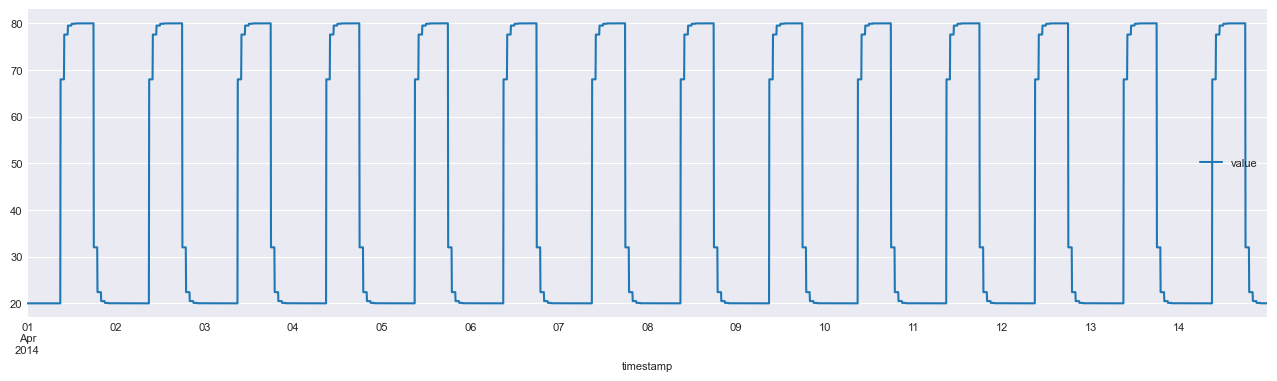

In [7]:
df_original = pd.read_csv('../data/artificialNoAnomaly/art_daily_no_noise.csv', parse_dates=["timestamp"])
df_original = df_original.set_index("timestamp")

plt.figure()
fig = df_original.plot()

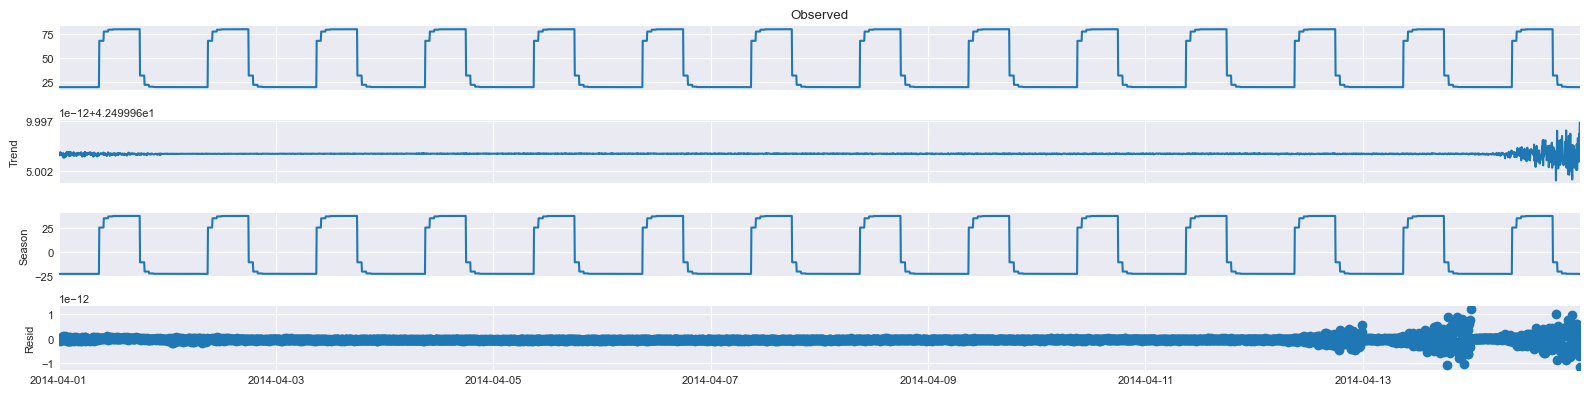

In [8]:
df = df_original.copy()

# sample every 5 seconds = (60/5) samples an hour = 60/5*24 samples a day
period=60//5*24
stl = statsmodels.tsa.seasonal.STL(df, period=period)
decomposed = stl.fit()
fig = decomposed.plot()

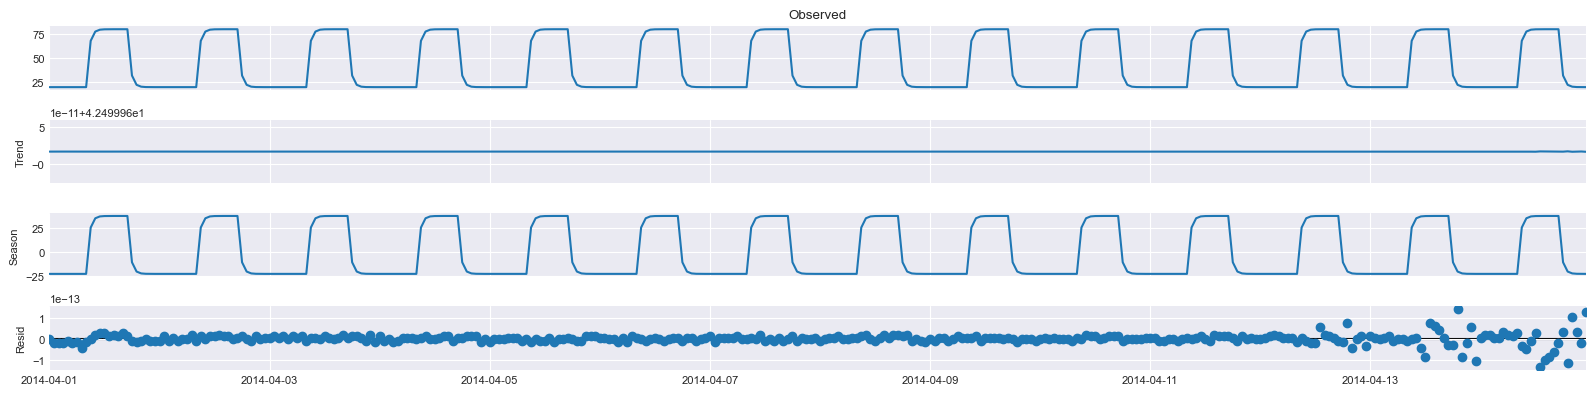

In [9]:
df = df_original.copy()

df = df.resample("1h").mean()
period=24
stl = statsmodels.tsa.seasonal.STL(df, period=period)
decomposed = stl.fit()
fig = decomposed.plot()